<font size=4.5><b>
<br> Final Assignment Part I
<br> Predictive Model Exercise
<br> Chuyu Chen
<br> Dec 4th, 2020


In [1]:
# Import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

## Data

In [2]:
data = pd.read_csv('Final Assignment.csv',encoding = 'ISO-8859-1')

/Users/chuyuchen/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (68) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,id,logtarg,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,...,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99,Unnamed: 66,Unnamed: 67,"Dear Greg,"
0,914,NaN,194,7,318.894775,1703,1,0,1,0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN
1,957,NaN,3,14,368.052246,2364,1,0,2,0,...,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0,NaN,NaN,I wanted to find something that the students c...
2,1406,NaN,1489,15,423.298340,2371,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN
3,1414,NaN,155,4,71.217041,1290,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,"I have data from American Science and Surplus,..."
4,1546,NaN,194,6,442.638184,2188,0,0,1,0,...,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0,NaN,NaN,NaN


In [4]:
# Remove last 3 columns
data.drop(data.iloc[:, 66:69], inplace = True, axis = 1)

In [5]:
data.head()

,id,logtarg,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,...,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99
0,914,NaN,194,7,318.894775,1703,1,0,1,0,...,14.899994,10.174706,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,957,NaN,3,14,368.052246,2364,1,0,2,0,...,74.156250,0.000000,22.749985,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0
2,1406,NaN,1489,15,423.298340,2371,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,1414,NaN,155,4,71.217041,1290,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,1546,NaN,194,6,442.638184,2188,0,0,1,0,...,41.518219,0.000000,7.949997,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0


In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.isnull().sum(axis = 0))

id                      0
logtarg             25402
r                       0
f                       0
m                       0
tof                     0
Ffiction1               0
Fclassics3              0
Fcartoons5              0
Flegends6               0
Fphilosophy7            0
Freligion8              0
Fpsychology9            0
Flinguistics10          0
Fart12                  0
Fmusic14                0
Ffacsimile17            0
Fhistory19              0
Fconthist20             0
Feconomy21              0
Fpolitics22             0
Fscience23              0
Fcompsci26              0
Frailroads27            0
Fmaps30                 0
Ftravelguides31         0
Fhealth35               0
Fcooking36              0
Flearning37             0
FGamesRiddles38         0
Fsports39               0
Fhobby40                0
Fnature41               0
Fencyclopaedia44        0
Fvideos50               0
Fnonbooks99             0
Mfiction1               0
Mclassics3              0
Mcartoons5  

In [7]:
# Drop 'longtarg' column
data.drop('logtarg', inplace=True, axis=1)

In [8]:
data.head()

,id,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,...,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99
0,914,194,7,318.894775,1703,1,0,1,0,0,...,14.899994,10.174706,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,957,3,14,368.052246,2364,1,0,2,0,0,...,74.156250,0.000000,22.749985,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0
2,1406,1489,15,423.298340,2371,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,1414,155,4,71.217041,1290,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,1546,194,6,442.638184,2188,0,0,1,0,3,...,41.518219,0.000000,7.949997,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0


### 1. Calculate basic stats descriptive statistics (mean, median, min, max, standard deviation) for each field

In [9]:
data.describe()

,id,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,...,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99
count,3.371300e+04,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,...,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000
mean,8.234209e+06,508.427254,5.820603,251.924325,1296.088186,0.590900,0.228102,0.356480,0.104767,0.290659,...,29.095301,4.223431,21.147507,0.305226,0.020681,6.785558,3.728635,8.402428,6.020431,1.800973
std,4.426015e+06,542.440039,7.008049,3929.929826,818.976321,1.762201,0.865510,1.105653,0.527764,1.088606,...,2087.221131,19.975164,2898.452008,1.991675,0.501499,21.197488,15.007592,46.021881,19.643978,21.383867
min,9.140000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.391616e+06,117.000000,1.000000,39.899994,536.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.967691e+06,293.000000,3.000000,102.629944,1311.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.199823e+07,712.000000,7.000000,247.297485,2132.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,18.899994,0.000000,2.500000,0.000000,0.000000,5.112919,0.000000,0.000000,0.000000,0.000000
max,1.625264e+07,2460.000000,118.000000,532892.000000,2462.000000,109.000000,29.000000,49.000000,22.000000,35.000000,...,383154.500000,820.563477,532182.000000,78.724670,21.448685,771.610840,735.354981,1999.150391,794.137695,2412.960938


In [10]:
# Only variable we are interested
num_cols = ['r','f','m']
data[num_cols].describe()

,r,f,m
count,33713.000000,33713.000000,33713.000000
mean,508.427254,5.820603,251.924325
std,542.440039,7.008049,3929.929826
min,0.000000,0.000000,0.000000
25%,117.000000,1.000000,39.899994
50%,293.000000,3.000000,102.629944
75%,712.000000,7.000000,247.297485
max,2460.000000,118.000000,532892.000000


/Users/chuyuchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


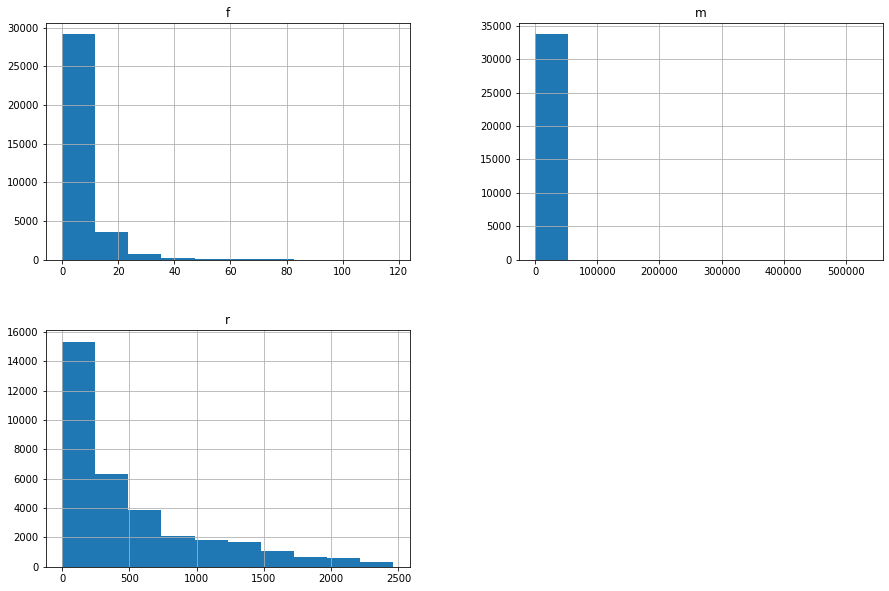

In [11]:
fig = plt.figure(figsize = (15, 10))
ax  = fig.gca()
data[num_cols].hist(ax = ax)
pass


/Users/chuyuchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


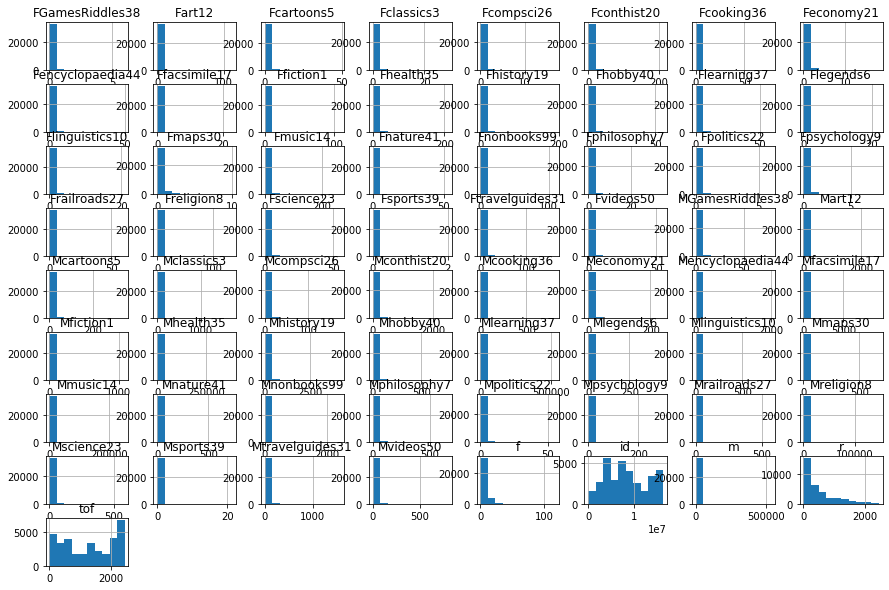

In [12]:
# Plotting distributions
# This allows to see the distribution of numeric data and compare boolean variables

fig = plt.figure(figsize = (15, 10))
ax  = fig.gca()
data.hist(ax = ax)
pass

In [13]:
new = data.rename(columns={'id': 'ID', 'r': 'Recency','f':'Frequency','m':'Monetary Value'})

In [14]:
new = new[['ID','Recency','Frequency', 'Monetary Value']]

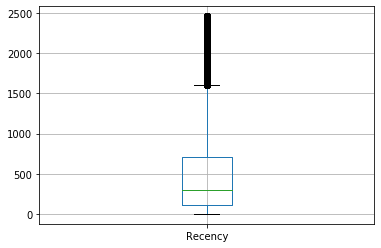

In [15]:
new.boxplot(column=['Recency'])

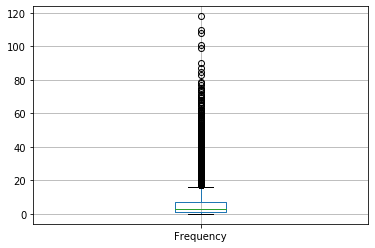

In [16]:
new.boxplot(column=[ 'Frequency'])

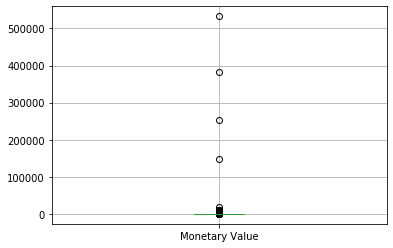

In [17]:
new.boxplot(column=['Monetary Value'])

### 2 - Create a new data set with more descriptive labels and the data needed for analysis

In [18]:
#df = data[['id','r','f','m']]

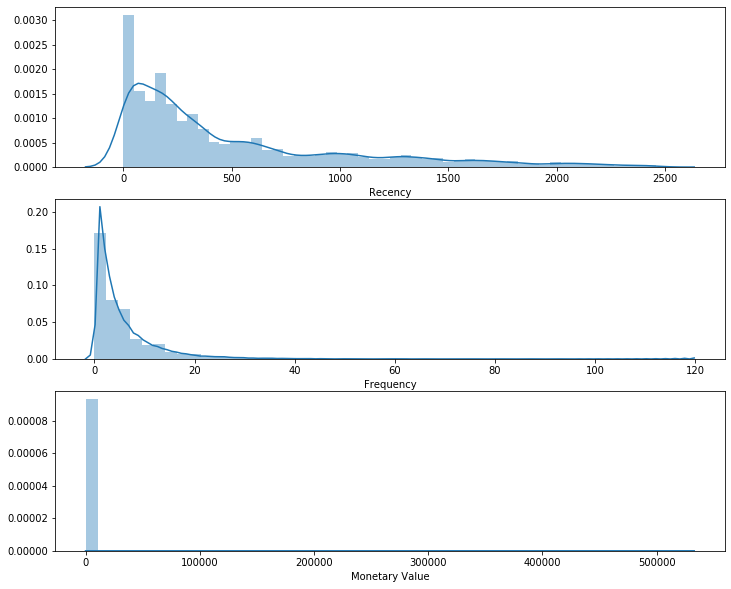

In [19]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(new['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(new['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(new['Monetary Value'])
# Show the plot
plt.show()

In [20]:
num_cols = ['Recency','Frequency','Monetary Value']
new[num_cols].describe()

,Recency,Frequency,Monetary Value
count,33713.000000,33713.000000,33713.000000
mean,508.427254,5.820603,251.924325
std,542.440039,7.008049,3929.929826
min,0.000000,0.000000,0.000000
25%,117.000000,1.000000,39.899994
50%,293.000000,3.000000,102.629944
75%,712.000000,7.000000,247.297485
max,2460.000000,118.000000,532892.000000


In [21]:
new['Monetary Value'].describe()

count     33713.000000
mean        251.924325
std        3929.929826
min           0.000000
25%          39.899994
50%         102.629944
75%         247.297485
max      532892.000000
Name: Monetary Value, dtype: float64

In [22]:
new.head()

,ID,Recency,Frequency,Monetary Value
0,914,194,7,318.894775
1,957,3,14,368.052246
2,1406,1489,15,423.298340
3,1414,155,4,71.217041
4,1546,194,6,442.638184


In [23]:
# Filter out monetary outliers
new = new[new['Monetary Value']<2000]


In [24]:
new.shape

(33527, 4)

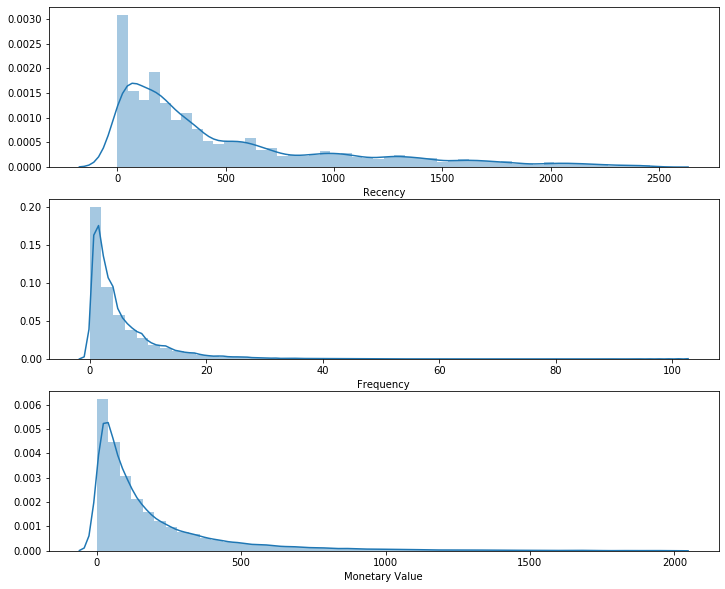

In [25]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(new['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(new['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(new['Monetary Value'])
# Show the plot
plt.show()

In [26]:
# Create the quartiles scores
quantiles = new.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()


In [27]:
def RFMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [28]:
new['R'] = new['Recency'].apply(RFMScore, args=('Recency',quantiles,))
new['F'] = new['Frequency'].apply(RFMScore, args=('Frequency',quantiles,))
new['M'] = new['Monetary Value'].apply(RFMScore, args=('Monetary Value',quantiles,))

In [29]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
new['RFM_Segment'] = new.apply(join_rfm, axis=1)

In [30]:
# Calculate RFM_Score
new['RFM_Score'] = new[['R','F','M']].sum(axis=1)

In [31]:
# Create human friendly RFM labels
segt_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][2-3]': 'At risk',
    r'[1-2]4': 'Can\'t loose them',
    r'2[1-2]': 'About to sleep',
    r'22': 'Need attention',
    r'[2-3][3-4]': 'Loyal customers',
    r'31': 'Promising',
    r'41': 'New customers',
    r'[3-4][1-2]': 'Potential loyalists',
    r'4[3-4]': 'Champions'
}

In [32]:
new['Segment'] = new['R'].map(str) + new['F'].map(str)
new['Segment'] = new['Segment'].replace(segt_map, regex=True)

In [33]:
# Create some human friendly labels for the scores
new['Score'] = 'Green'
new.loc[new['RFM_Score']>5,'Score'] = 'Bronze' 
new.loc[new['RFM_Score']>7,'Score'] = 'Silver' 
new.loc[new['RFM_Score']>9,'Score'] = 'Gold' 
new.loc[new['RFM_Score']>10,'Score'] = 'Platinum'

# List the head of the table to view the 
new.head(5)

,ID,Recency,Frequency,Monetary Value,R,F,M,RFM_Segment,RFM_Score,Segment,Score
0,914,194,7,318.894775,2,3,4,2.03.04.0,9,At risk,Silver
1,957,3,14,368.052246,1,4,4,1.04.04.0,9,Can't loose them,Silver
2,1406,1489,15,423.298340,4,4,4,4.04.04.0,12,Champions,Platinum
3,1414,155,4,71.217041,2,3,2,2.03.02.0,7,At risk,Bronze
4,1546,194,6,442.638184,2,3,4,2.03.04.0,9,At risk,Silver


In [34]:
# Calculate average values for each RFM_Level, and return a size of each segment 
agg_segment = new.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary Value': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(agg_segment)

                    Recency Frequency Monetary Value      
                       mean      mean           mean count
Segment                                                   
At risk               121.9       5.3          185.0  3985
Can't loose them      106.3      15.6          516.7  5459
Champions            1164.7       6.9          262.4  2904
Hibernating           134.9       1.7           55.4  7339
Loyal customers       476.1       8.6          310.9  3974
New customers        1484.6       1.0           40.6  2574
Potential loyalists   985.2       2.4           89.4  4933
Promising             463.3       1.0           33.6  2359


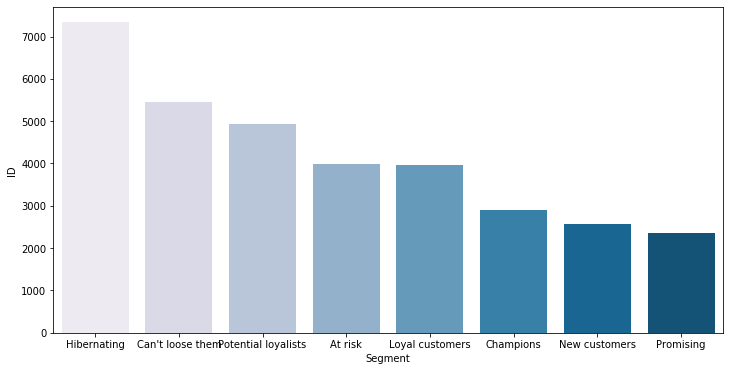

In [35]:
#Bar chart of how many customers reside in each category

sq1 = new.groupby('Segment')['ID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,6))
#sq1.drop([0],inplace = True)
sns.barplot(data=sq1, x='Segment', y = 'ID', orient=True, palette='PuBu')

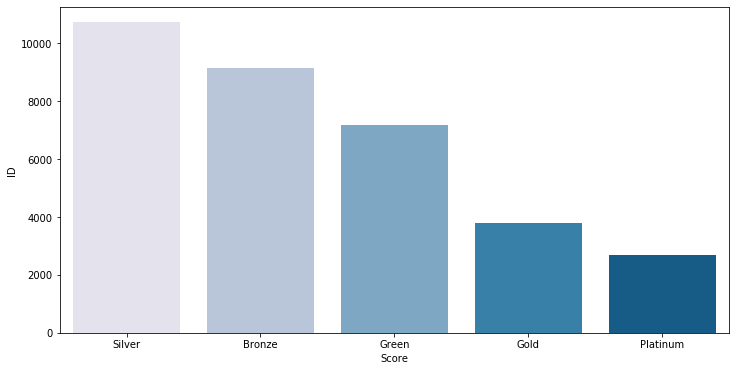

In [36]:
#Bar chart the RFM score and how it compares

sq2 = new.groupby('Score')['ID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,6))
#sq2.drop([0],inplace = True)
sns.barplot(data=sq2, x='Score', y = 'ID', orient=True, palette='PuBu')